# Beräknings kod

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import argrelextrema
from scipy import stats as st

def time_diff(data_in):
    n = 5
    data_in['max'] = data_in.loc[argrelextrema(data_in.values, np.greater_equal, order=n)[0]]
    data_in['max'][data_in['max'] < 0.1] = np.nan
    t = np.array(data_in['max'].dropna().index.tolist())/250
    try:
        dt = t[1]-t[0]
        T = (t[1]+t[0])/2
    except:
        dt=1
        T = 1
    return dt, T
    
data = pd.read_csv('lilg.csv', delimiter=';', decimal=',')
data.astype('float64')

time = data[['Time (s) Run #1']].copy()
l1 = 0.147
l2 = 0.296
data = data.drop(labels='Time (s) Run #1', axis=1)
dt = {}

for (columnName, columnData) in data.items():
    dt[columnName] = time_diff(columnData)

dt = pd.DataFrame.from_dict(dt, orient='index')

gate1 = dt.query("index.str.contains('289-982')")
gate2 = dt.query("index.str.contains('805-621')")

T1=gate1[1].to_numpy()
T2=gate2[1].to_numpy()
dt1=gate1[0].to_numpy()
dt2=gate2[0].to_numpy()

dT = T2-T1
v1=l1/dt1
v2=l2/dt2
dv=v2-v1 
a=dv/dT

a = np.delete(a, (2,28,29,45))
index = np.arange(0, a.size, 1)

a_mean = a.mean()
a_std = a.std()
a_sem = st.sem(a)

print(f'medelvärde: {a_mean}, standardavikelse: {a_std}, standard error of the mean: {a_sem}')


medelvärde: 8.707163586842995, standardavikelse: 1.4647688606556537, standard error of the mean: 0.20714959884810114


/tmp/ipykernel_6301/1902847088.py:46: RuntimeWarning: divide by zero encountered in divide
  a=dv/dT


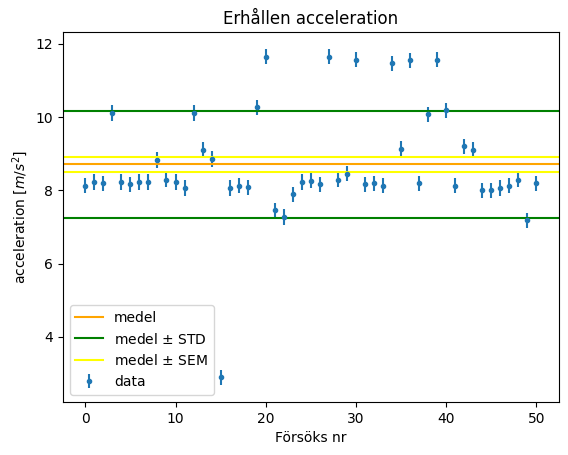

In [8]:
fig, ax = plt.subplots()
ax.errorbar(index, a, a_sem, label='data', fmt='.')
ax.axhline(y=a_mean, color='orange', label='medel')
ax.axhline(y=a_mean + a_std, color='green', label='medel $\pm$ STD')
ax.axhline(y=a_mean - a_std, color='green')
ax.axhline(y=a_mean + a_sem, color='yellow', label='medel $\pm$ SEM')
ax.axhline(y=a_mean - a_sem, color='yellow')
ax.set_xlabel('Försöks nr')
ax.set_ylabel('acceleration [$m/s^2$]')
ax.set_title('Erhållen acceleration')
ax.legend()

In [4]:
test = data['Voltage, 289-982 (V) Run #13'].dropna().to_numpy()
n = 5
print(test)

[-2.000e-02 -2.000e-02 -2.200e-02 -1.900e-02 -2.100e-02 -1.300e-02
 -2.200e-02 -2.100e-02 -2.100e-02 -2.100e-02 -2.200e-02 -2.000e-02
 -2.100e-02 -1.700e-02 -1.900e-02 -2.000e-02 -1.900e-02 -2.100e-02
 -2.000e-02 -2.100e-02 -1.500e-02 -2.100e-02 -1.800e-02 -1.900e-02
 -2.000e-02 -2.000e-02 -1.800e-02 -2.000e-02 -1.600e-02 -1.900e-02
 -2.000e-02 -1.800e-02 -2.000e-02 -2.000e-02 -2.100e-02 -1.400e-02
 -2.000e-02 -2.000e-02 -2.000e-02 -1.900e-02 -2.100e-02 -2.000e-02
 -2.100e-02 -1.700e-02 -2.000e-02 -2.000e-02 -1.800e-02 -2.100e-02
 -1.900e-02 -2.000e-02 -1.000e-02 -2.000e-02 -2.000e-02 -2.000e-02
 -2.000e-02 -1.800e-02 -1.800e-02 -2.100e-02 -1.500e-02 -1.900e-02
 -2.000e-02 -1.900e-02 -1.900e-02 -1.900e-02 -2.100e-02 -1.600e-02
 -2.100e-02 -1.900e-02 -2.100e-02 -1.800e-02 -1.900e-02 -1.900e-02
 -2.000e-02 -1.700e-02 -1.800e-02 -1.900e-02 -1.800e-02 -2.000e-02
 -1.700e-02 -1.900e-02 -1.700e-02 -2.100e-02 -1.800e-02 -1.900e-02
 -1.900e-02 -2.000e-02 -2.000e-02 -1.800e-02 -1.300e-02 -1.900

Text(0.5, 1.0, 'Spänning över tid för ett spolpar')

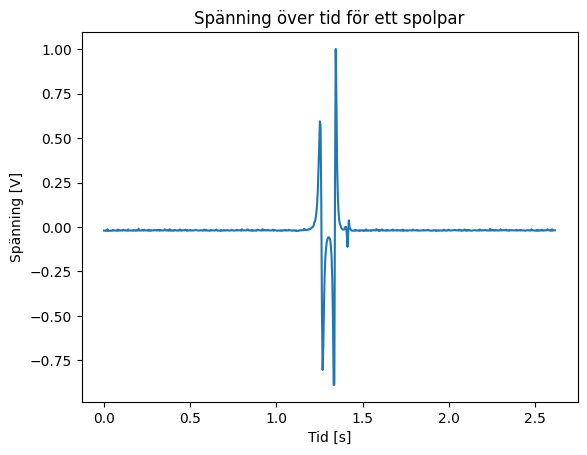

In [5]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, test.size, 1)/250, test)
ax.set_xlabel('Tid [s]')
ax.set_ylabel('Spänning [V]')
ax.set_title('Spänning över tid för ett spolpar')